<a href="https://colab.research.google.com/github/Francelinojr/Estrutura-de-dados/blob/main/C%C3%B3pia_de_C%C3%B3pia_de_SeriesTemporais_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)

In [11]:
df = pd.read_csv("/content/DailyDelhiClimateTrain.csv")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [14]:
df.date = pd.DatetimeIndex(df.date.values)
df = df.set_index('date')
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

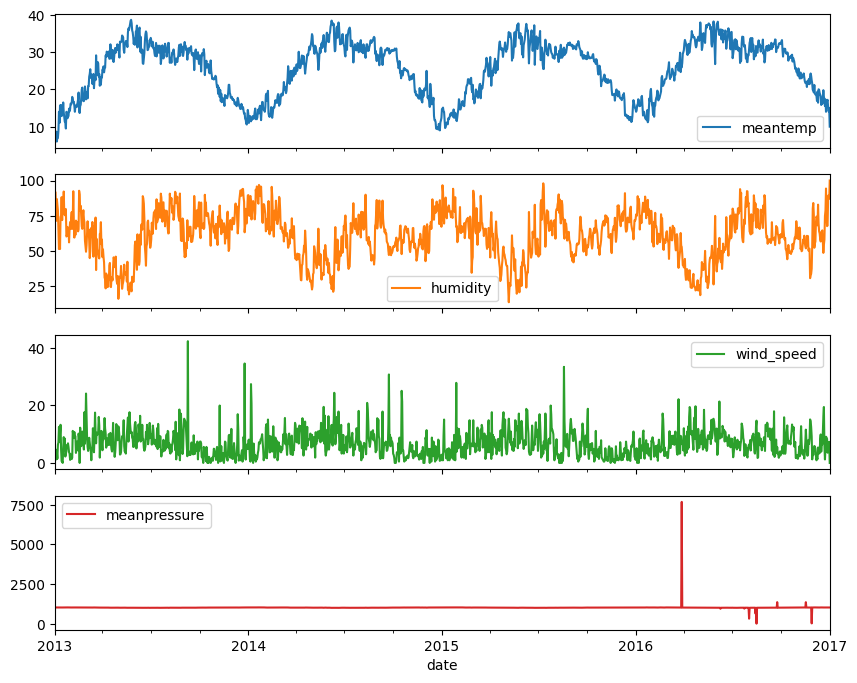

In [15]:
df.plot(subplots=True, figsize=(10,8))

In [18]:
# Defina sua série temporal
serie = df['meantemp']

# Calcule a média móvel com uma janela de seis meses
media_movel = serie.rolling(window=6).mean()

In [25]:
import pandas as pd
import plotly.graph_objects as go



# Plotar a temperatura média ao longo do tempo
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['meantemp'],
                    mode='lines',
                    name='Temperatura Média'))
fig.update_layout(title='Temperatura Média Diária ',
                    xaxis_title='Data',
                    yaxis_title='Temperatura Média (°C)')
fig.show()

In [26]:
plt.rcParams['figure.figsize'] = (20, 10)

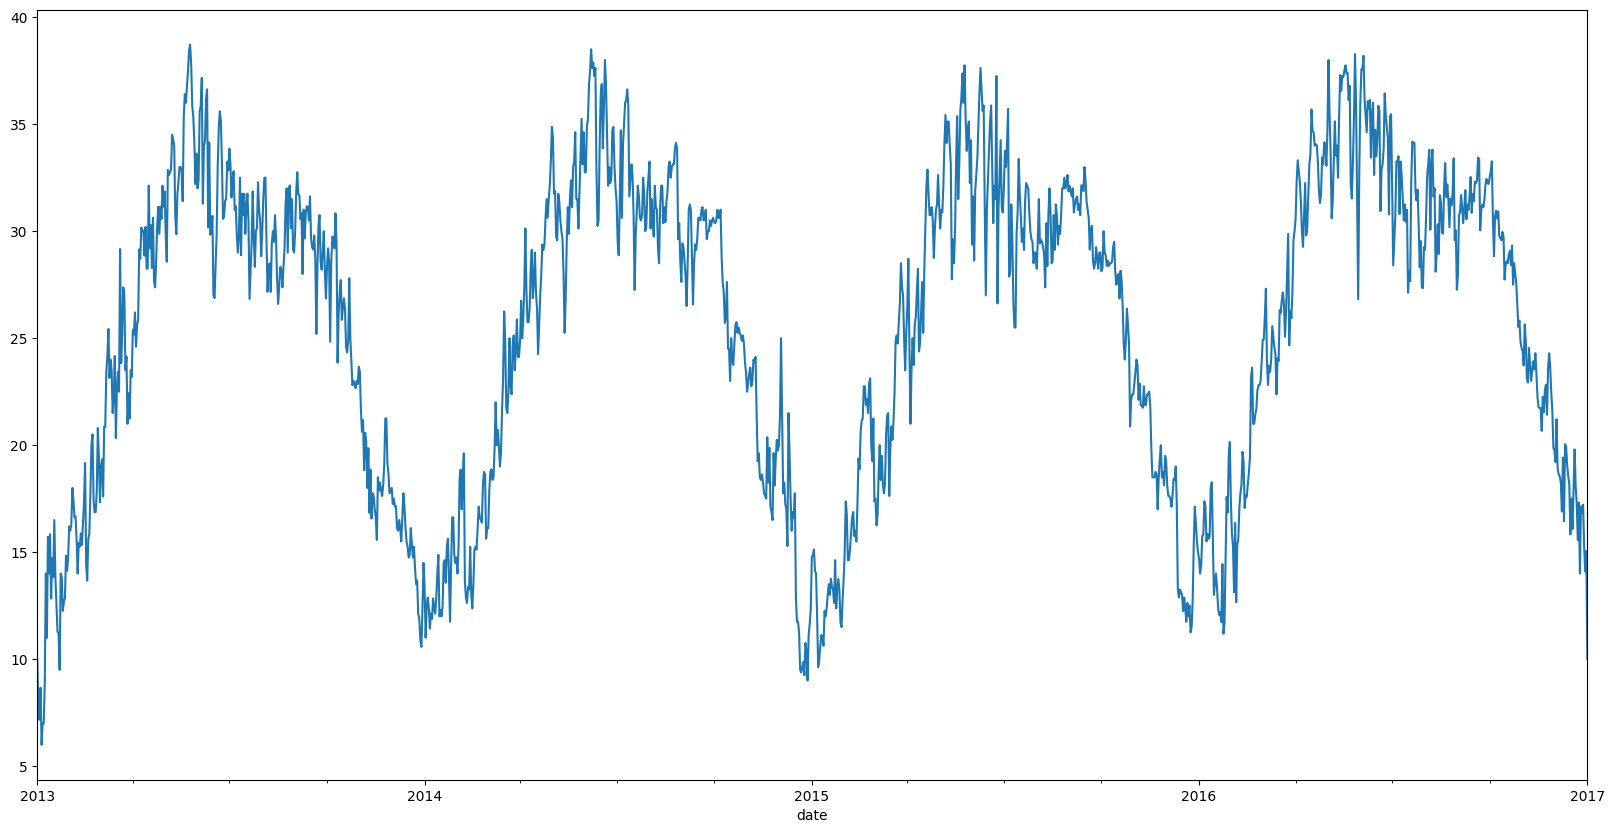

In [29]:
serie.plot();

# Média móvel

A média móvel é utilizada para suavizar grandes desvios e auxiliar a identificação de tendências nos dados. Usaremos a média móvel dos últimos seis meses no presente trabalho.

In [34]:


# Calcular a média móvel de 6 meses para todas as colunas
media_movel = df.rolling(window=6).mean()

# Plotar a média móvel
fig = go.Figure()
for column in media_movel.columns:
    fig.add_trace(go.Scatter(x=media_movel.index, y=media_movel[column],
                        mode='lines',
                        name=column))

fig.update_layout(title='Média móvel de 6 meses das variáveis climáticas em Delhi',
                    xaxis_title='Data',
                    yaxis_title='Valor')
fig.show()


In [37]:

# Substitua "df" pelo nome do seu DataFrame
fig = go.Figure()

# Adicionar traços para cada coluna
for column in df.columns:
    fig.add_trace(go.Scatter(x=df.index, y=df[column],
                             mode='lines',
                             name=column))

# Atualizar o layout do gráfico
fig.update_layout(title='Série histórica de variáveis climáticas em Delhi',
                  xaxis_title='Data',
                  yaxis_title='Valor')

# Mostrar o gráfico
fig.show()


# Decomposição

Vamos decompor a série em tendência, sazonalidade e resíduos:

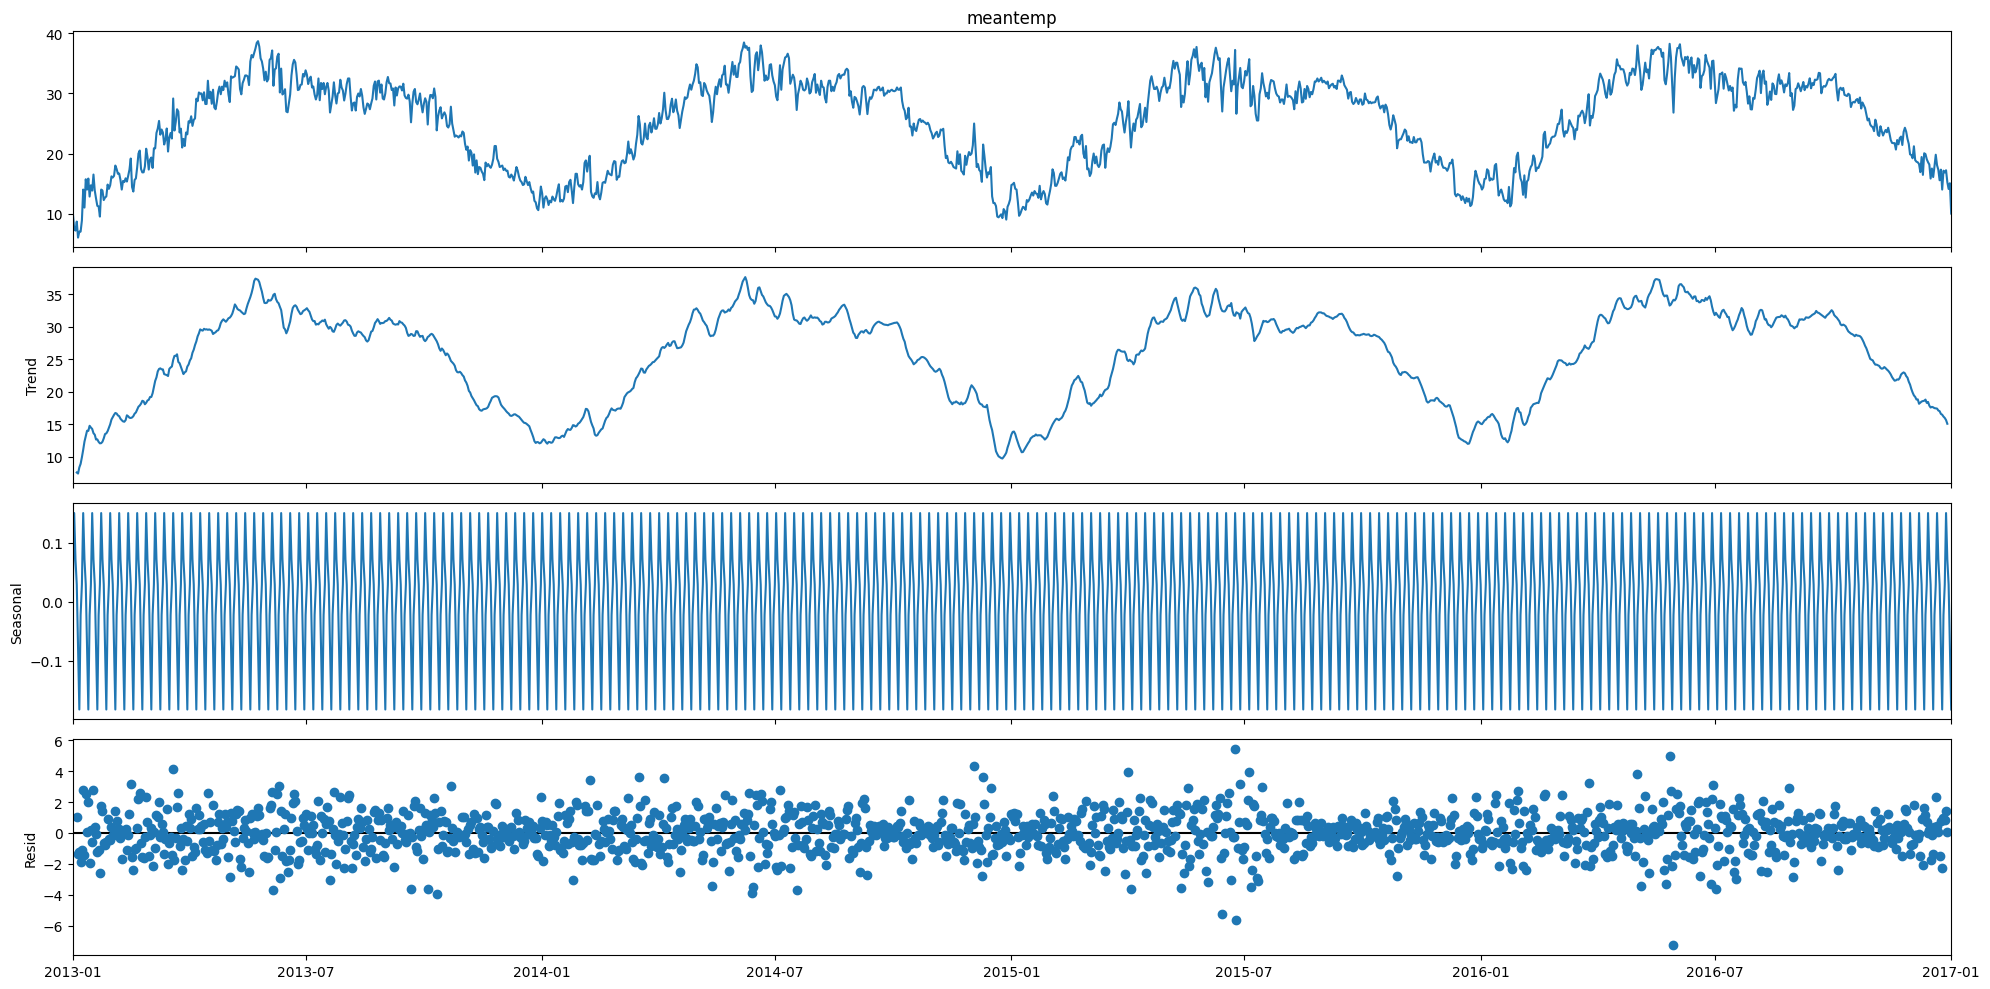

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposicao = seasonal_decompose(serie)
decomposicao.plot();

Observações:

Tendência: O gráfico apresenta muitas oscilações, não demonstrando um comportamento claramente crescente (ascendente) ou decrescente. A ausência de um padrão bem definido reforça a ideia de que não há uma tendência linear forte.

Sazonalidade: Há uma forte sazonalidade presente, caracterizada por picos constantes e intervalos bem definidos de aproximadamente um ano. Isso sugere que as variações de temperatura seguem um padrão cíclico previsível ao longo do ano.

O caráter oscilatório da tendência indica que flutuações de curto prazo desempenham um papel significativo nos dados.
A forte sazonalidade indica que fatores sazonais influenciam consideravelmente as variações de temperatura.
O uso de resíduos para construção e validação de modelos é apropriado, pois permite isolar a tendência subjacente e as relações entre as variáveis, ao mesmo tempo em que leva em conta os padrões sazonais.

Normalidade

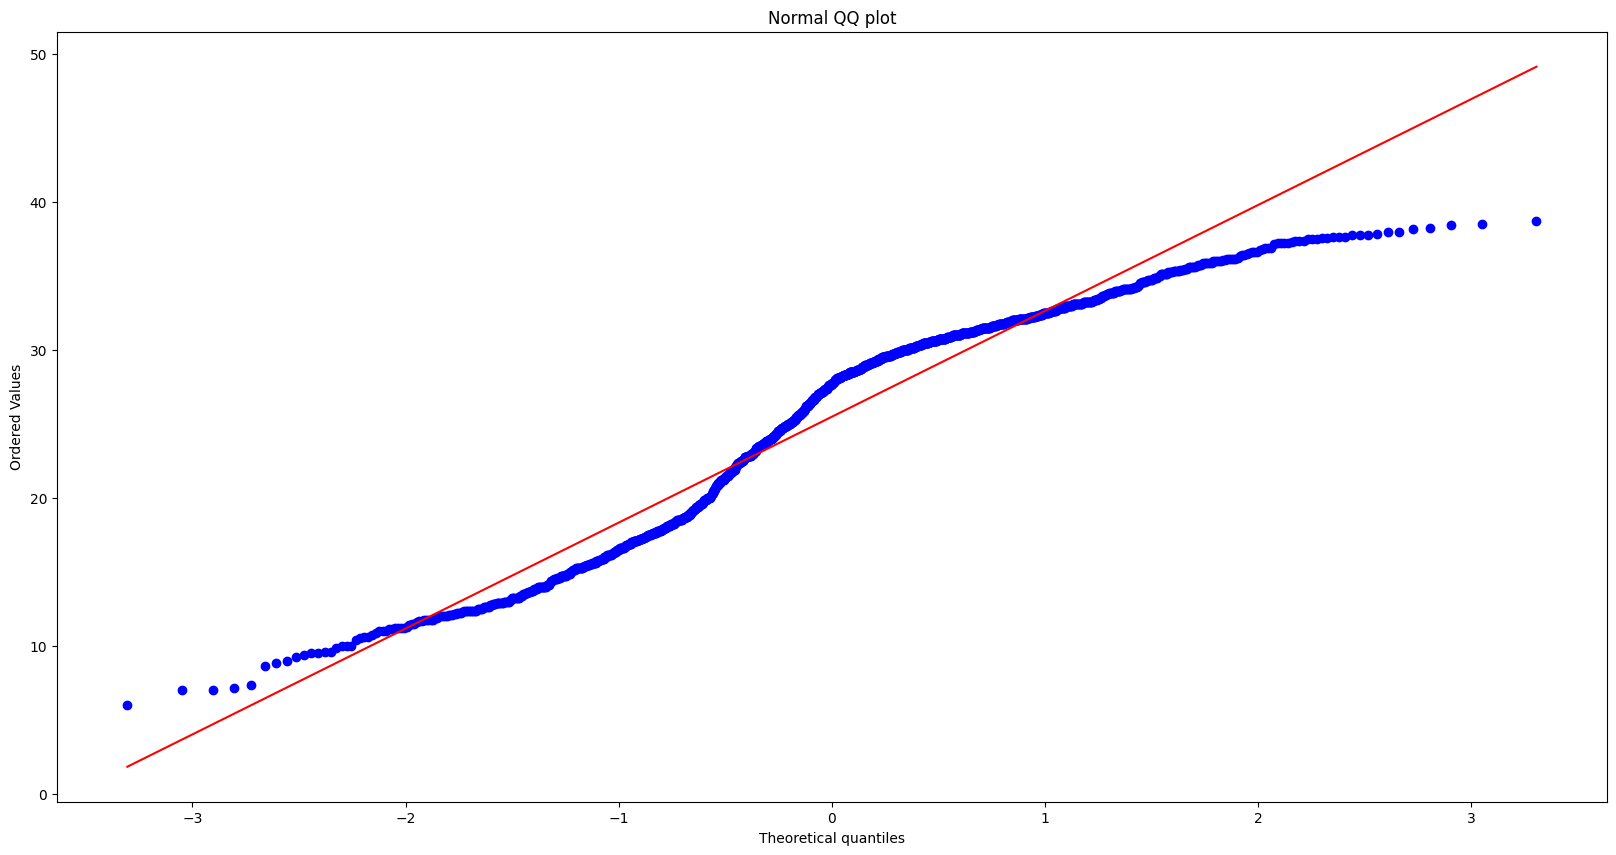

In [39]:
import scipy.stats as stats

stats.probplot(serie, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

Graficamente, fica evidente que os dados não seguem uma distribuição normal. A natureza de caudas pesadas dos dados indica a presença de outliers e um padrão de distribuição não normal.

Mesmo assim, faremos um teste de hipóteses para verificação da normalidade da série. Usaremos o teste de Shapiro-Wilk, ideal para o tamanho da amostra, com nível de significância de 5%.

Teste Shapiro-Wilk

H0 = distribuição normal p > 0,05

H1 = distribuição não normal p <= 0,05

In [40]:
e, p = stats.shapiro(serie)
print(f'Estátistica de teste: {e:.4f}')
print(f'p-valor: {p:.4e}')

Estátistica de teste: 0.9440
p-valor: 4.1645e-23


De fato, os dados não seguem uma distribuição normal.

Para fazer com que a série se aproxime de uma distribuição normal, faremos uma transformação por raiz cúbica. Assim, criaremos uma nova série, composta pela raiz cúbica dos dados originais.

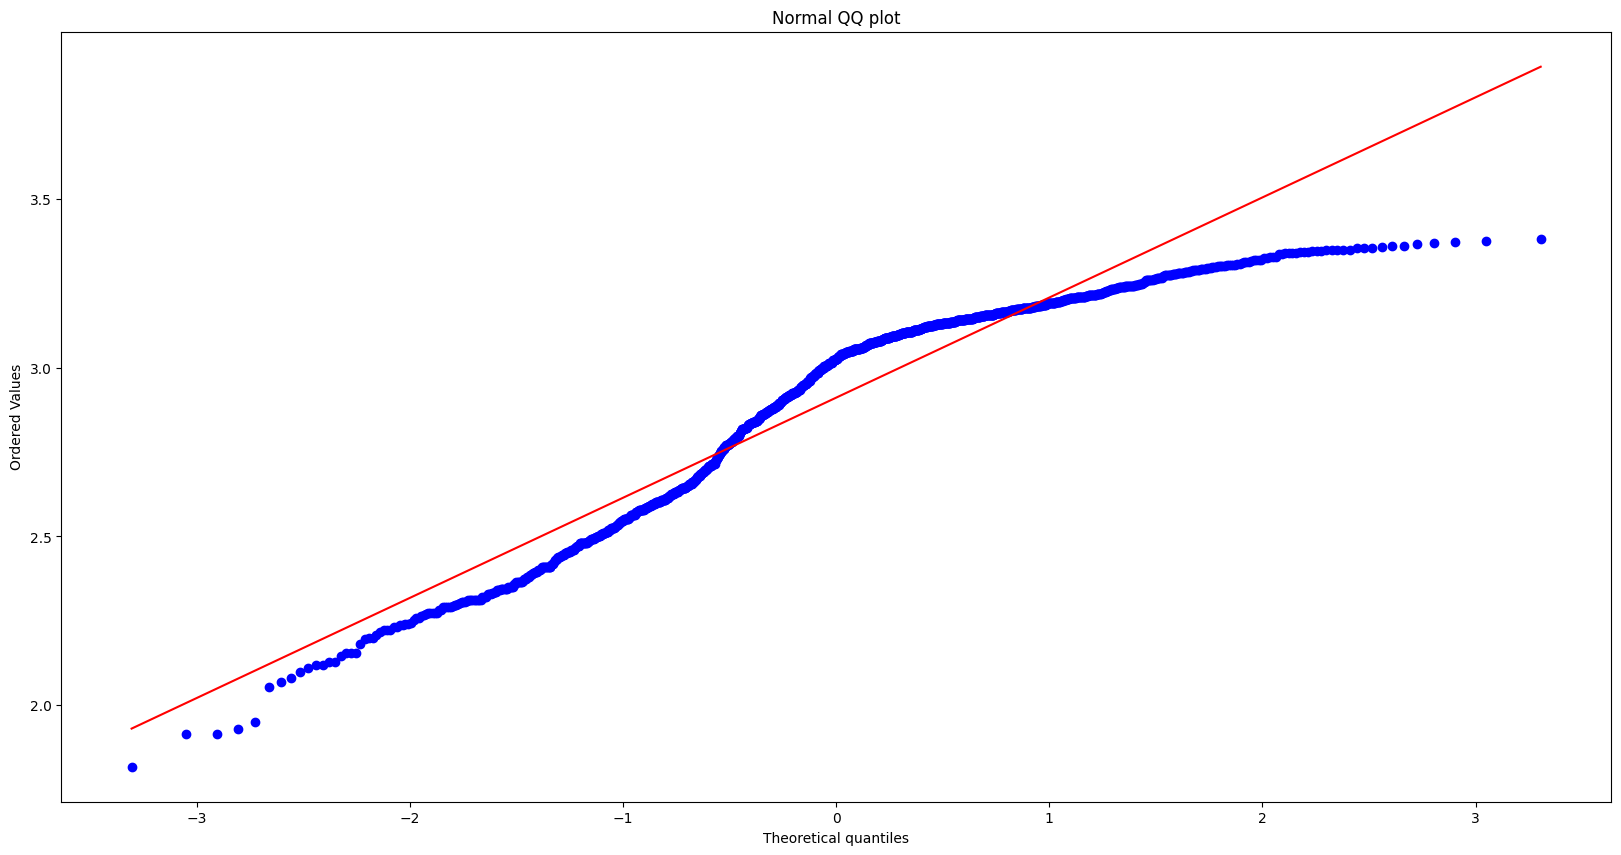

In [41]:
serie_n = (serie)**(1/3)
stats.probplot(serie_n, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

Após a transformação, os dados já estão mais próximos de uma distribuição normal. Para comprovar isso, repetiremos o teste de Shapiro-Wilk.

In [42]:
e, p = stats.shapiro(serie_n)
print(f'Estátistica de teste: {e:.4f}')
print(f'p-valor: {p:.4e}')

Estátistica de teste: 0.9190
p-valor: 2.7246e-27


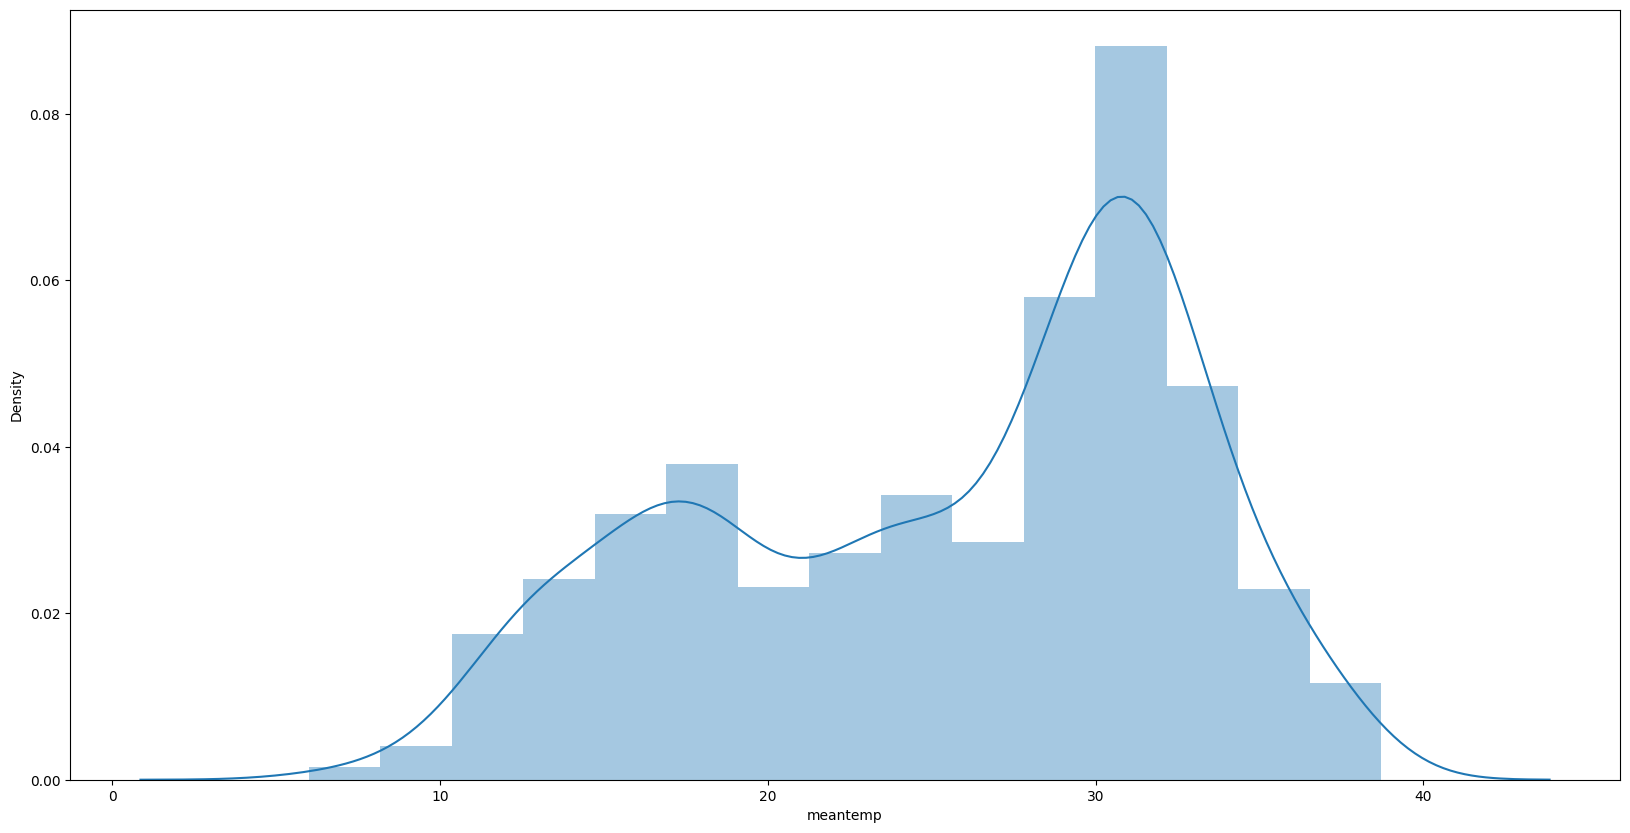

In [44]:
import warnings
import seaborn as sns

# Suprimir os avisos temporariamente
warnings.filterwarnings("ignore")

# Seu código aqui
sns.distplot(serie)

# Restaurar os avisos para o comportamento padrão
warnings.filterwarnings("default")


<ipython-input-45-2976302a5587>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




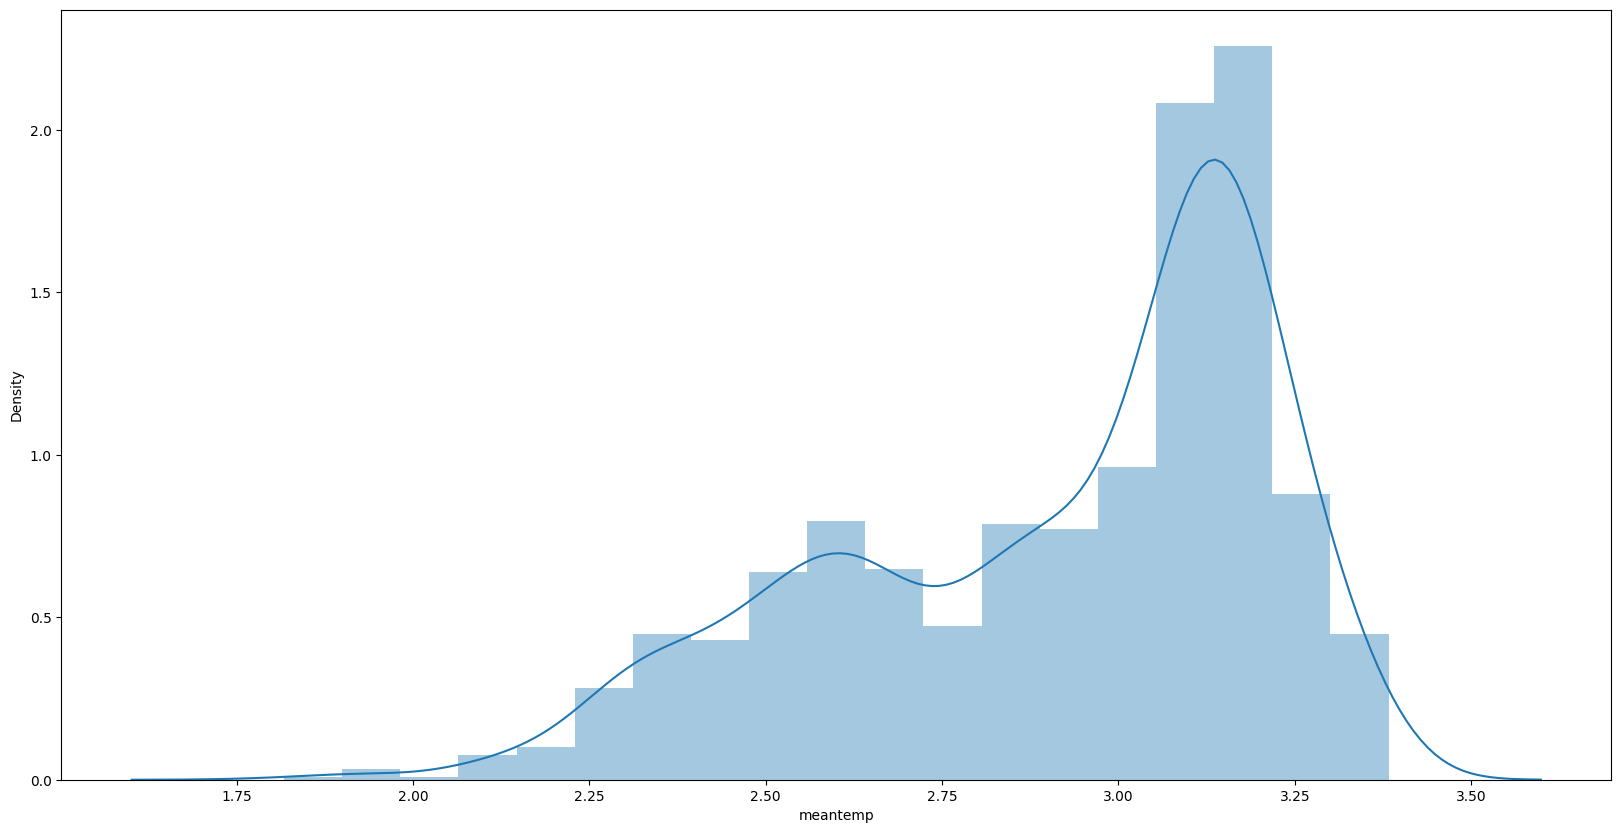

In [45]:
sns.distplot(serie_n);

# Estacionariedade



Estacionariedade é a característica de séries que se desenvolvem no tempo através de uma média/variância constante.

Séries não estacionárias costumam seguir uma tendência e mudam de comportamento por inclinação ou mudança de nível no gráfico.

Para determinar a estacionariedade de uma série, utilizamos testes estatísticos. Para a nossa série, usaremos o teste KPSS.

Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

H0 = não é estacionário: estatística do teste > valor crítico

H1 = é estacionário: estatística do teste < valor crítico

Para escolha do valor crítico, utilizaremos o valor de referência para 5%

In [48]:
import statsmodels.tsa.stattools
import warnings
import seaborn as sns

# Suprimir os avisos temporariamente
warnings.filterwarnings("ignore")


# Restaurar os avisos para o comportamento padrão
warnings.filterwarnings("default")


kpss = statsmodels.tsa.stattools.kpss(serie_n)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
    print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 0.1942
p_valor: 0.1000
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


<ipython-input-48-8c585a8033bf>:13: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




Qualquer valor de p-valor menor que o nível de significância como evidência para rejeitar a hipótese nula. Nesse caso, como o p-valor é 0,1000 (menor que 0,05), a série seria considerada não estacionária.

Dessa forma, terá que fazer a diferenciação.

# Autocorrelação

A autocorrelação ocorre quando há correlação entre determinados períodos anteriores com o período atual.

Períodos com autocorrelação são chamados de lags.

A análise de autocorrelação dos resíduos é um pressuposto para construção e validação de modelos preditivos.

Para verificar a autocorrelação, utilizaremos os diagramas ACF e PACF.

Veremos nos diagramas abaixo que série é autocorrelacionada, com valores acima do intervalo de confiança.

Isso não será um problema, pois esse é um pressuposto da análise dos resíduos dos modelos de séries temporais.

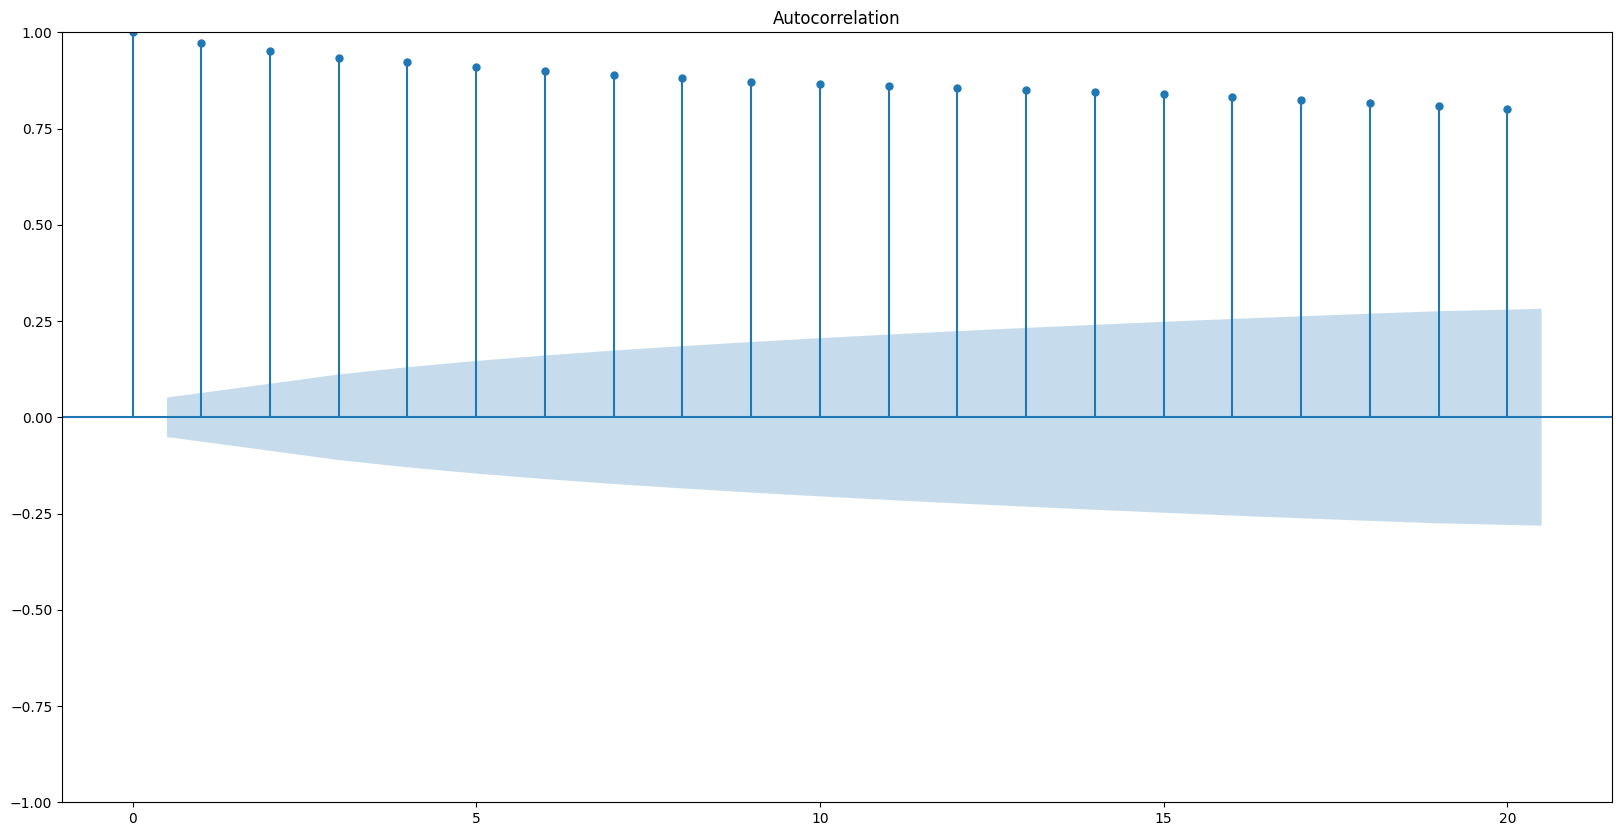

In [51]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

# Suprimir os avisos temporariamente
warnings.filterwarnings("ignore")

# Seu código de plotagem
plot_acf(serie_n, lags=20)
plt.show()

# Restaurar os avisos para o comportamento padrão
warnings.filterwarnings("default")


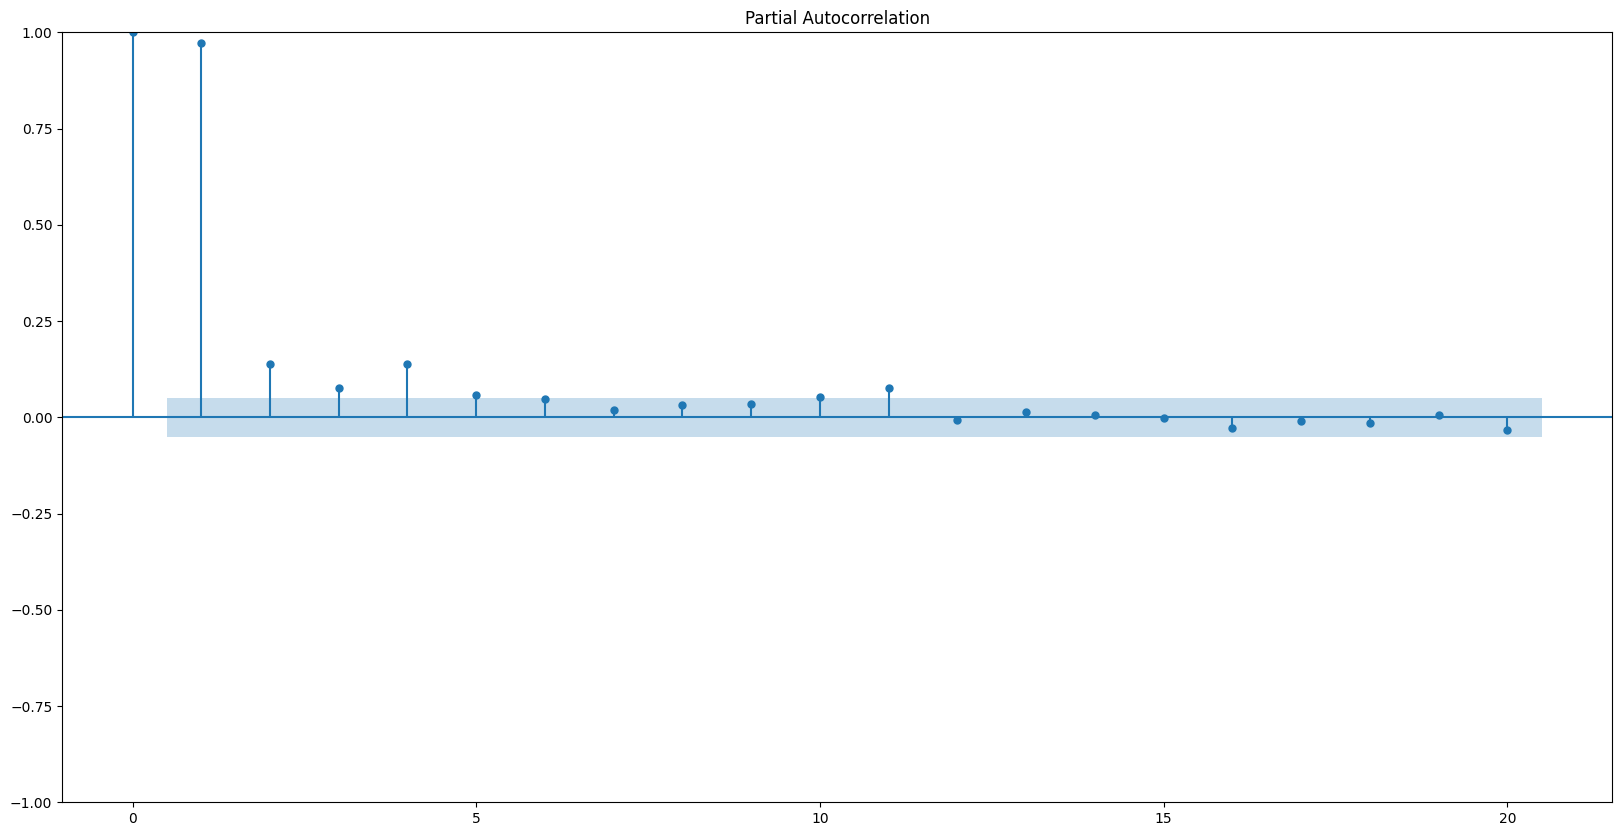

In [52]:
plot_pacf(serie, lags=20)
plt.show()

# Modelo AR

Modelos ARIMA não sazonais são geralmente denotados como ARIMA(p, d, q), em que o parâmetro p é a ordem do modelo auto-regressivo, d é o grau de diferenciação e q é a ordem do modelo de média móvel.

O modelo AR (Auto-Regressivo) indica que a variável evoluinte de interesse é regressada em seus próprios valores anteriores.

Ele é um modelo ARIMA nos quais os parâmetros d e q são nulos e o parâmetro p não.

AIC (Critério de Informação de Akaike) e BIC (Critério de Informação Bayesiano) são métricas que mensuram a qualidade de um modelo estatístico. Quanto menor for o AIC e BIC, melhor é o modelo.

In [54]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Suprimir os avisos temporariamente
warnings.filterwarnings("ignore")

for p in range(1, 11):
    modelo_ar = ARIMA(serie_n, order = (p,0,0))
    teste = modelo_ar.fit()

    print(f'ARIMA({p},0,0) - AIC: {teste.aic:.4f}')

# Restaurar os avisos para o comportamento padrão
warnings.filterwarnings("default")


ARIMA(1,0,0) - AIC: -3698.0482
ARIMA(2,0,0) - AIC: -3733.3242
ARIMA(3,0,0) - AIC: -3739.9592
ARIMA(4,0,0) - AIC: -3761.9227
ARIMA(5,0,0) - AIC: -3763.7989
ARIMA(6,0,0) - AIC: -3767.5152
ARIMA(7,0,0) - AIC: -3766.3788
ARIMA(8,0,0) - AIC: -3767.0356
ARIMA(9,0,0) - AIC: -3764.9759
ARIMA(10,0,0) - AIC: -3767.6792


In [56]:
import warnings

# Suprimir os avisos temporariamente
warnings.filterwarnings("ignore")

modelo_ar = ARIMA(serie_n, order = (7,0,0))
resultado = modelo_ar.fit()
print(resultado.summary())

# Restaurar os avisos para o comportamento padrão
warnings.filterwarnings("default")

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(7, 0, 0)   Log Likelihood                1892.189
Date:                Wed, 17 Apr 2024   AIC                          -3766.379
Time:                        04:05:43   BIC                          -3718.791
Sample:                    01-01-2013   HQIC                         -3748.628
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8347      0.127     22.294      0.000       2.585       3.084
ar.L1          0.7860      0.021     37.056      0.000       0.744       0.828
ar.L2          0.0828      0.026      3.148      0.0

# Análise dos Resíduos

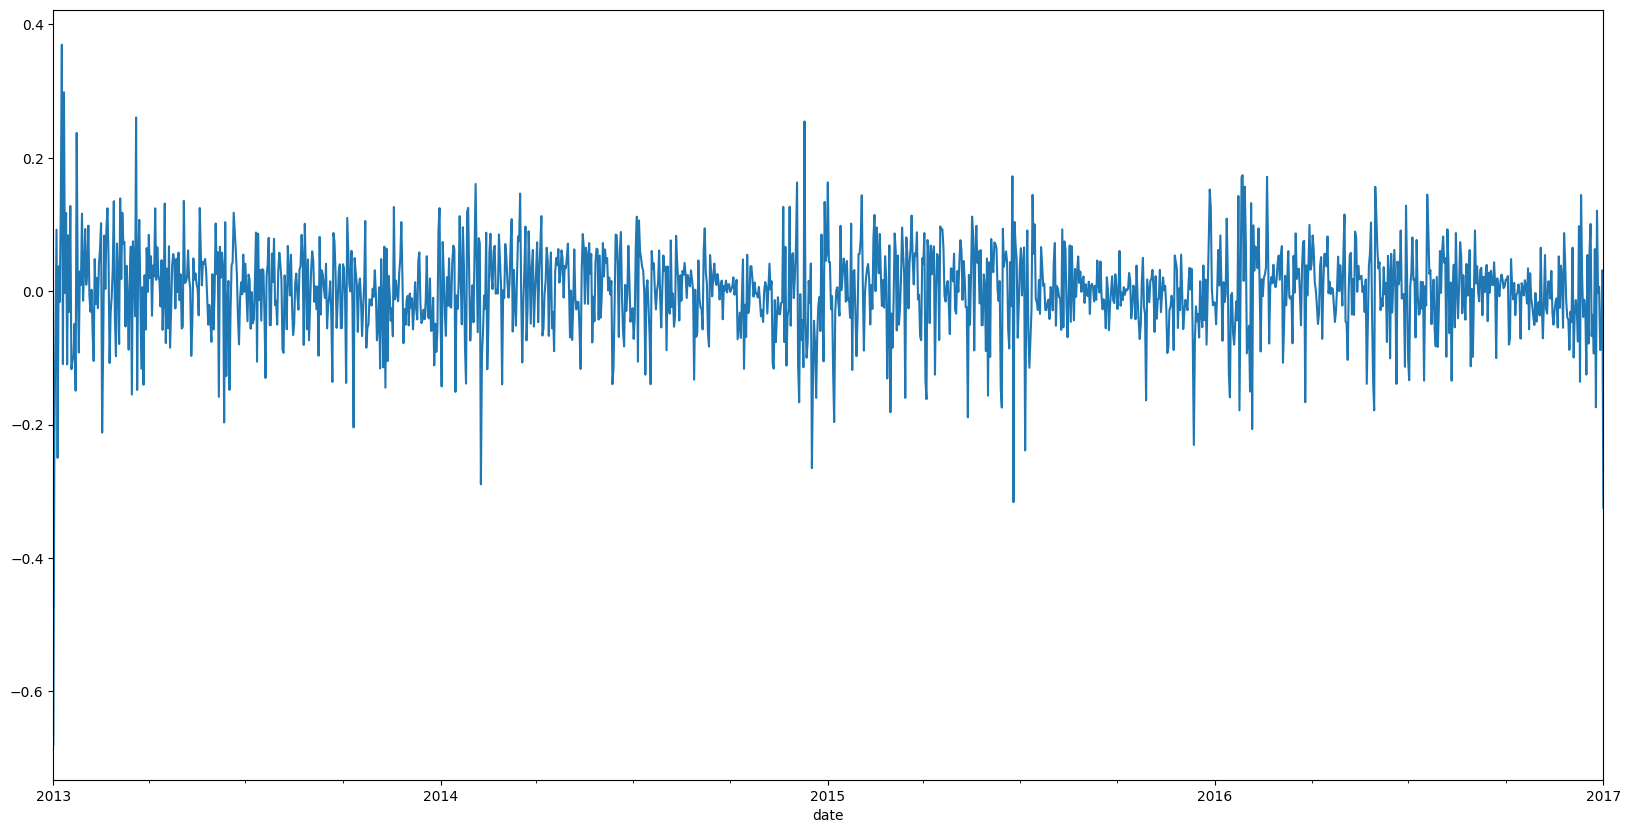

In [57]:
residuos = resultado.resid
residuos.plot();


Média em torno do zero, com pouca tendência.

Resíduos bem concentrados, estáveis.

# Normalidade

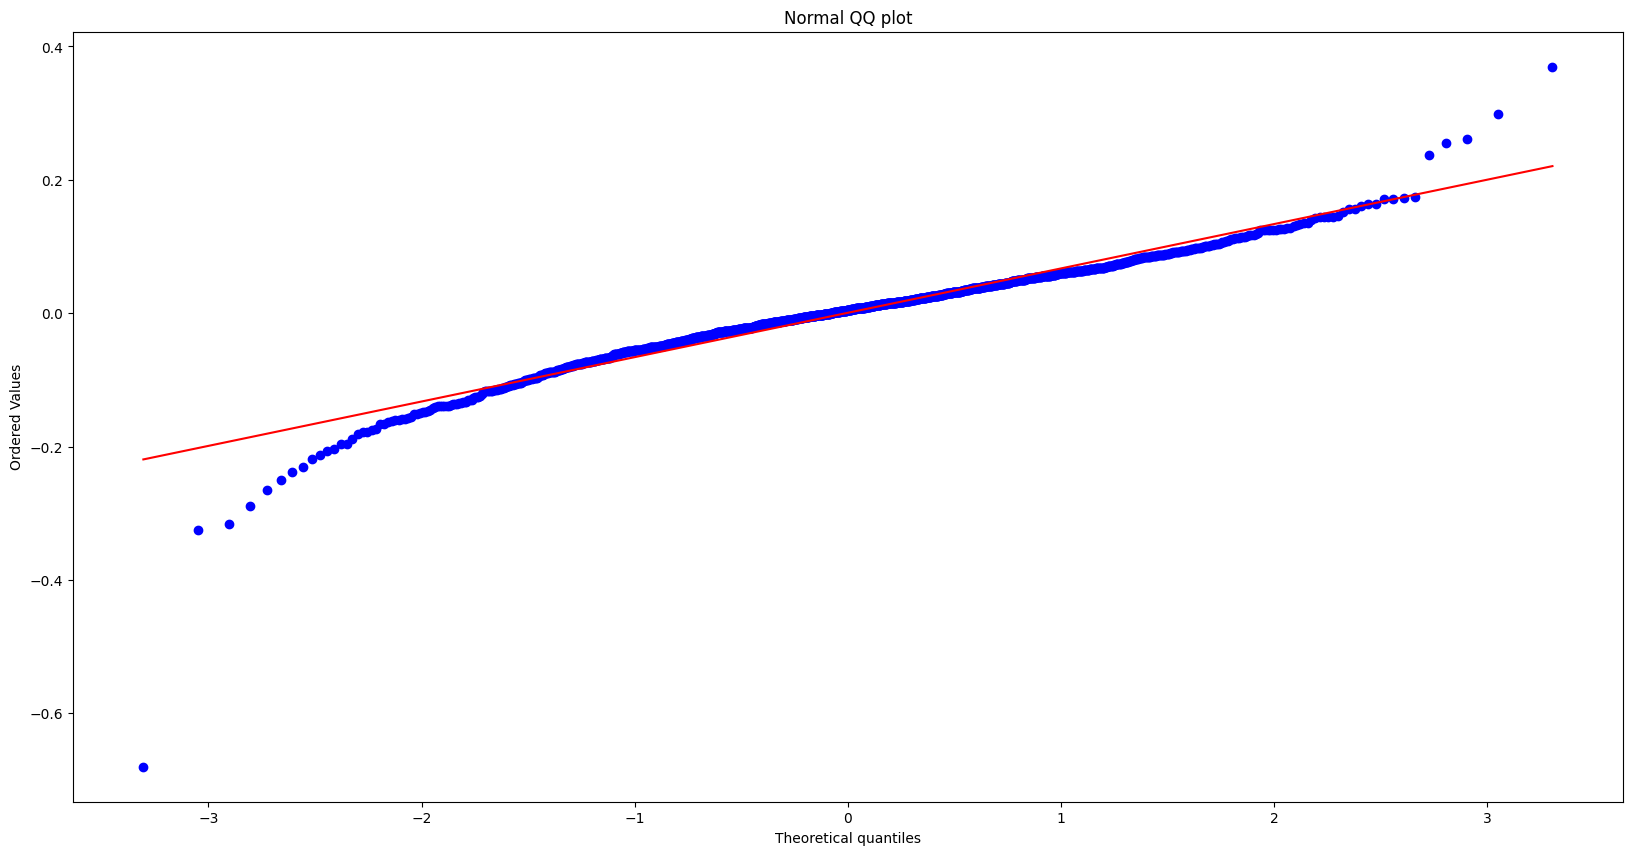

In [58]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

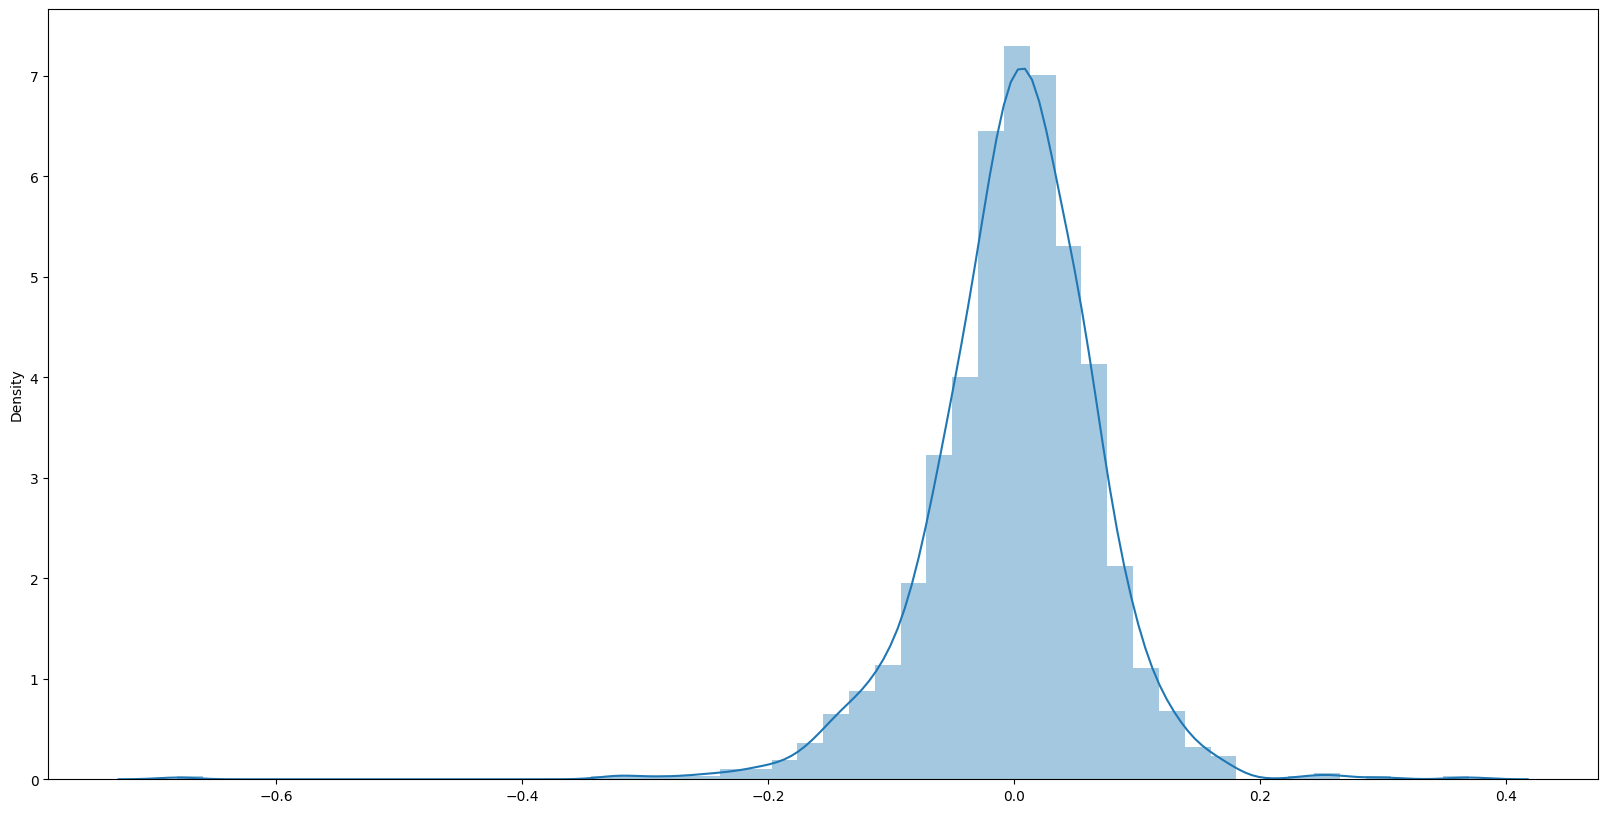

In [60]:
import warnings

# Suprimir os avisos temporariamente
warnings.filterwarnings("ignore")

sns.distplot(residuos);

# Restaurar os avisos para o comportamento padrão
warnings.filterwarnings("default")

Graficamente, a série aparenta se aproximar de uma distribuição normal. Façamos o teste de Shapiro-Wilk para verificar:

In [61]:
e, p = stats.shapiro(residuos)
print(f'Estátistica de teste: {e:.4f}')
print(f'p-valor: {p:.4e}')

Estátistica de teste: 0.9424
p-valor: 2.0334e-23


Isso indica que a distribuição dos resíduos não é normal

# Autocorrelação

Analisemos a autocorrelação dos resíduos usando ACF e PACF:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



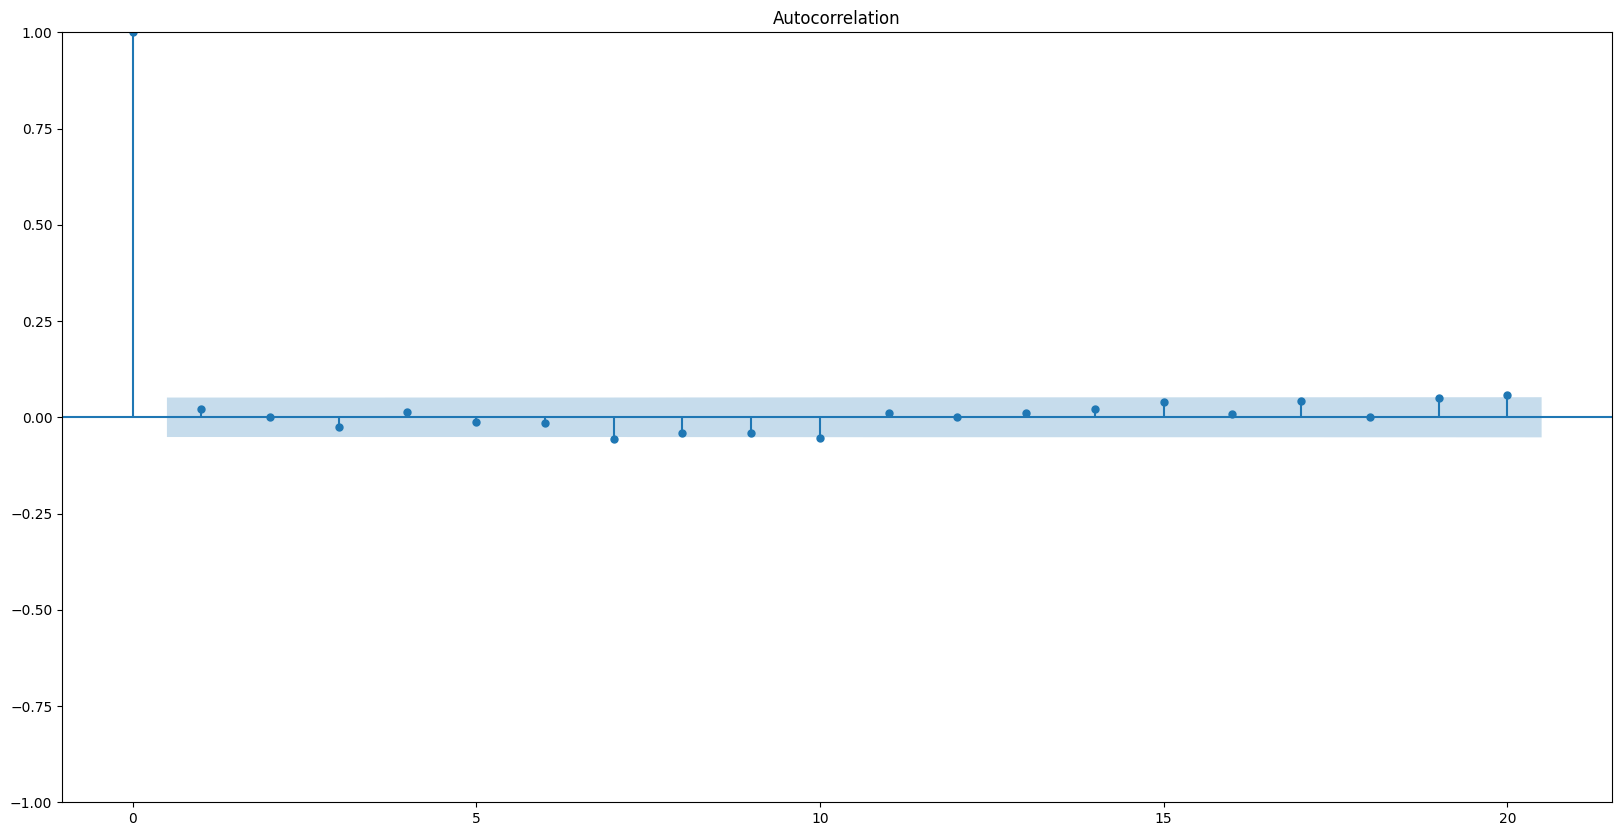

In [64]:
import warnings

# Suprimir os avisos temporariamente
warnings.filterwarnings("ignore")

plot_acf(residuos, lags=20)
plt.show()

# Restaurar os avisos para o comportamento padrão
warnings.filterwarnings("default")

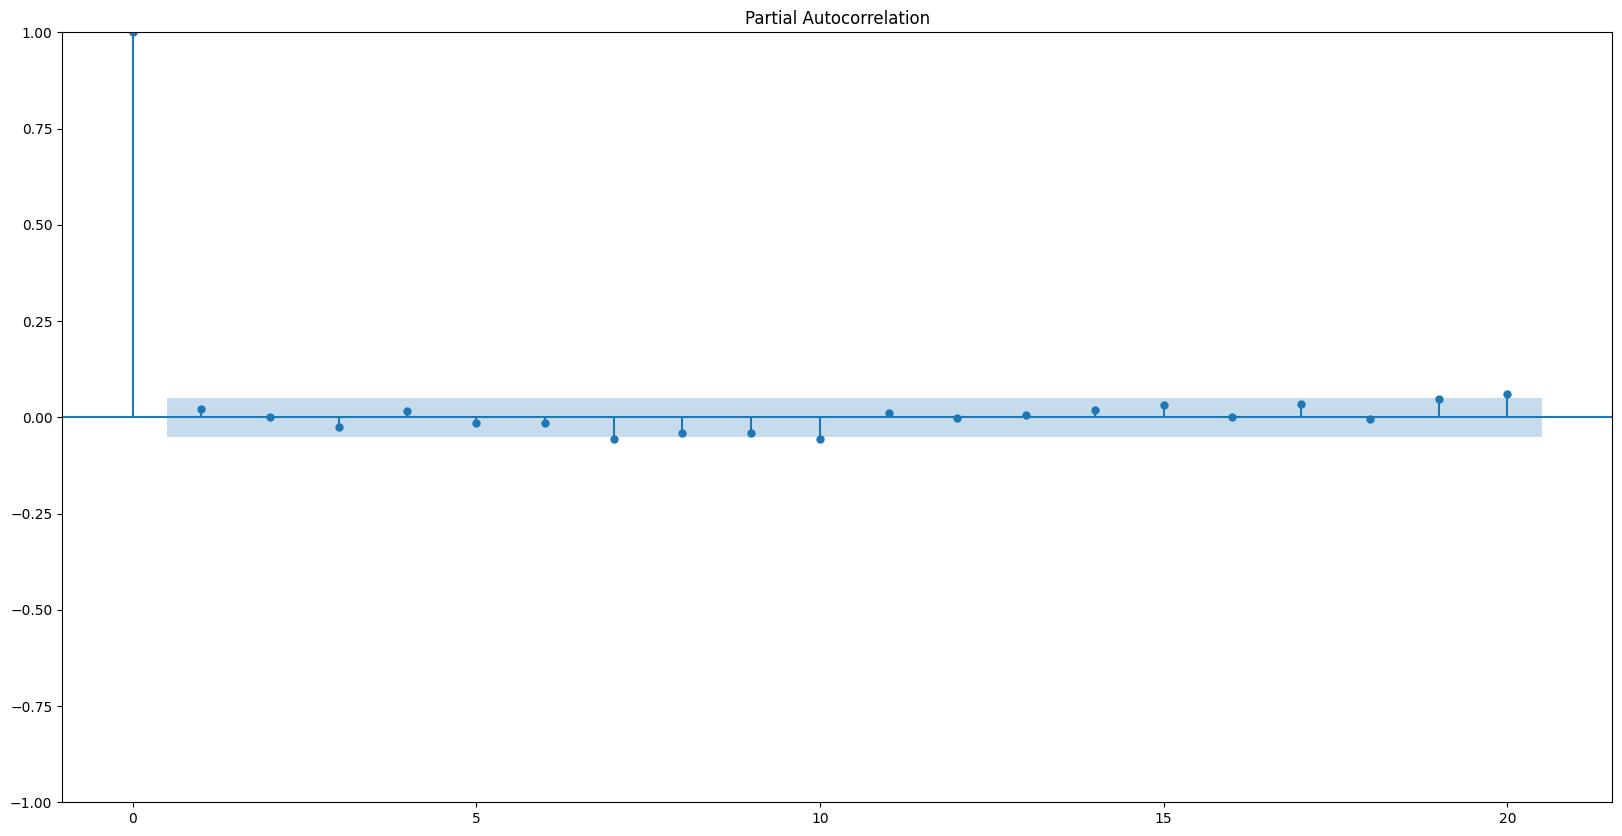

In [65]:
plot_pacf(residuos, lags=20)
plt.show()

Como todos os pontos de ambos os gráficos estão muito próximos do intervalo de confiança, concluímos que os resídios não possuem autocorrelação

# Previsão

In [71]:
resultado.fittedvalues
previsao = resultado.predict(start=500, end=1000)
print(previsao)

2014-05-16    29.340955
2014-05-17    30.397585
2014-05-18    29.419850
2014-05-19    30.678256
2014-05-20    31.695783
                ...    
2015-09-24    28.876686
2015-09-25    28.506873
2015-09-26    28.702027
2015-09-27    29.173712
2015-09-28    28.748302
Freq: D, Name: predicted_mean, Length: 501, dtype: float64


In [73]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA

# Ajustar o modelo ARIMA
modelo_arima = ARIMA(df['meantemp'], order=(7, 0, 0))  # Substitua p, d, q pelos valores adequados
resultado = modelo_arima.fit()

# Fazer previsões
previsao = resultado.predict(start=500, end=1000)

# Plotar os dados
fig = go.Figure()

# Adicionar a série histórica
fig.add_trace(go.Scatter(x=df.index, y=df['meantemp'],
                         mode='lines',
                         name='Série histórica'))

# Adicionar os resíduos
fig.add_trace(go.Scatter(x=df.index, y=resultado.resid,
                         mode='lines',
                         name='Resíduos'))

# Adicionar as previsões
fig.add_trace(go.Scatter(x=previsao.index, y=previsao,
                         mode='lines',
                         name='Previsão AR'))

# Atualizar o layout do gráfico
fig.update_layout(title='Série histórica de temperatura média em Delhi',
                  xaxis_title='Data',
                  yaxis_title='Temperatura Média (°C)')

# Mostrar o gráfico
fig.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



O plot acima leva em consideração os dados transformados (raiz cúbica). Vamos plotar e guardar a previsão em seus valores originais:

In [74]:
prev_escala = pd.DataFrame(previsao**3)
prev_escala.columns = ['Modelo_AR']
prev_escala

,Modelo_AR
2014-05-16,25259.382314
2014-05-17,28087.767655
2014-05-18,25463.692195
2014-05-19,28873.007313
2014-05-20,31842.300507
...,...
2015-09-24,24079.200488
2015-09-25,23165.875771
2015-09-26,23644.911640
2015-09-27,24829.905684


Agora, o plot com os dados corrigidos:

In [78]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=serie.index, y=serie.values,
                    mode='lines',
                    name='Série histórica'))
fig.add_trace(go.Scatter(x=prev_escala.index, y=prev_escala['Modelo_AR'],
                    mode='lines',
                    name='Previsão'))

Problemas do modelo:

resíduos não seguem uma distribuição normal

# Modelo MA

Modelo ARIMA: (p,d,q)

Modelo MA: (0,0,q)

O modelo de Média Móvel (MA) é uma abordagem importante na análise e previsão de séries temporais. Diferentemente do modelo AR (Auto-Regressivo), o modelo MA baseia-se na premissa de que o valor atual de uma série temporal é influenciado por ruídos aleatórios ou erros residuais de previsões passadas. Em um modelo MA, a previsão é feita calculando-se uma média ponderada desses erros residuais anteriores, onde a ordem do modelo, representada como MA(q), determina quantos períodos anteriores são considerados.

In [80]:
import warnings

# Suprimir os avisos temporariamente
warnings.filterwarnings("ignore")

for q in range(1, 11):
    modelo_ma = ARIMA(serie_n, order = (0,0,q))
    teste = modelo_ma.fit()
    print(f'ARIMA(0,0,{q}) - AIC: {teste.aic:.4f}')

# Restaurar os avisos para o comportamento padrão
warnings.filterwarnings("default")

ARIMA(0,0,1) - AIC: -797.3456
ARIMA(0,0,2) - AIC: -1769.4010
ARIMA(0,0,3) - AIC: -2284.6800
ARIMA(0,0,4) - AIC: -2623.9189
ARIMA(0,0,5) - AIC: -2834.6295
ARIMA(0,0,6) - AIC: -3002.1950
ARIMA(0,0,7) - AIC: -3085.6615
ARIMA(0,0,8) - AIC: -3202.5502
ARIMA(0,0,9) - AIC: -3283.4040
ARIMA(0,0,10) - AIC: -3326.0893


O menor valor de AIC foi obtido com q = 8

In [81]:
modelo_ma = ARIMA(serie_n, order = (0,0,8))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [82]:
resultado_ma = modelo_ma.fit()
print(resultado_ma.summary())

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(0, 0, 8)   Log Likelihood                1611.275
Date:                Wed, 17 Apr 2024   AIC                          -3202.550
Time:                        04:18:32   BIC                          -3149.675
Sample:                    01-01-2013   HQIC                         -3182.827
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9078      0.018    164.369      0.000       2.873       2.942
ma.L1          1.0606      0.020     51.765      0.000       1.020       1.101
ma.L2          1.1368      0.031     36.200      0.0

# Modelo AutoARIMA

Modelo ARIMA: (p,d,q)

Modeo SARIMA: (p,d,q)(P,D,Q)

O modelo AutoARIMA considera os componentes do modelo ARIMA + os componente de sazonalidade do modelo SARIMA, sendo o mais completo dentre os apresentados. Uma das grandes vantagens do modelo AutoARIMA é, além de considerar a sazonalidade, a automatização da busca pelos melhores parâmetros.

In [88]:
pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:86: ResourceWarning:

unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/pmdarima-2.0.4.dist-info/top_level.txt' mode='r' encoding='UTF-8'>



In [ ]:
import warnings

# Suprimir os avisos temporariamente
warnings.filterwarnings("ignore")

from pmdarima.arima import auto_arima

# Restaurar os avisos para o comportamento padrão
warnings.filterwarnings("default")

In [ ]:
import warnings

# Suprimir os avisos temporariamente
warnings.filterwarnings("ignore")

## Buscando o melhor arranjo de parâmetros para o modelo AutoARIMA

modelo_auto = auto_arima(serie_n, trace=True, stepwise=False, seasonal=True,
                         max_p=10, max_q=10, max_P=4, max_Q=4,
                         start_p=0, start_q=0, start_P=0, start_Q=0, m=12)

## trace: imprime o resultado de cada iteração
## stepwise: realiza a busca de forma mais rápida
## seasonal: considerar ou não a sazonalidade
## m: período da sazonalidade (mensal)

# Restaurar os avisos para o comportamento padrão
warnings.filterwarnings("default")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-3686.835, Time=0.33 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-3685.142, Time=1.44 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=-3683.392, Time=2.59 sec
 ARIMA(0,1,0)(0,0,3)[12] intercept   : AIC=-3681.639, Time=15.14 sec
 ARIMA(0,1,0)(0,0,4)[12] intercept   : AIC=-3680.229, Time=33.13 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-3685.149, Time=3.96 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-3683.122, Time=2.79 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=-3681.365, Time=9.35 sec
 ARIMA(0,1,0)(1,0,3)[12] intercept   : AIC=-3679.633, Time=12.04 sec
 ARIMA(0,1,0)(1,0,4)[12] intercept   : AIC=-3678.183, Time=56.26 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=-3683.418, Time=6.64 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=-3681.394, Time=6.58 sec


Os parâmetros escolhidos pelo modelo foram ARIMA(0,0,0)(1,0,3).

In [ ]:
print(modelo_auto.aic())

In [ ]:
resultado_auto = modelo_auto.fit(serie_n)
print(resultado_auto.summary())

# Análise dos resíduos

In [ ]:
residuos_auto = resultado_auto.resid
plt.plot(residuos_auto())
plt.show();

Resíduos com média em torno de zero, sem tendência.

# Normalidade

In [ ]:
stats.probplot(residuos_auto(), dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [ ]:
sns.distplot(residuos_auto());

Graficamente, os resíduos se aproximam de uma gaussiana. Façamos o teste de hipóteses:

In [ ]:
e, p = stats.shapiro(residuos_auto())
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Os resíduos não seguem uma distribuição normal

# Autocorrelação

In [ ]:
plot_acf(residuos_auto(), lags=30)
plt.show()

In [ ]:
plot_pacf(residuos_auto(), lags=30)
plt.show()

Verificando os gráficos do ACF e do PACF, notamos que os valores estão dentro do intervalo de confiança, mostrando que os resíduos não possuem correlação.